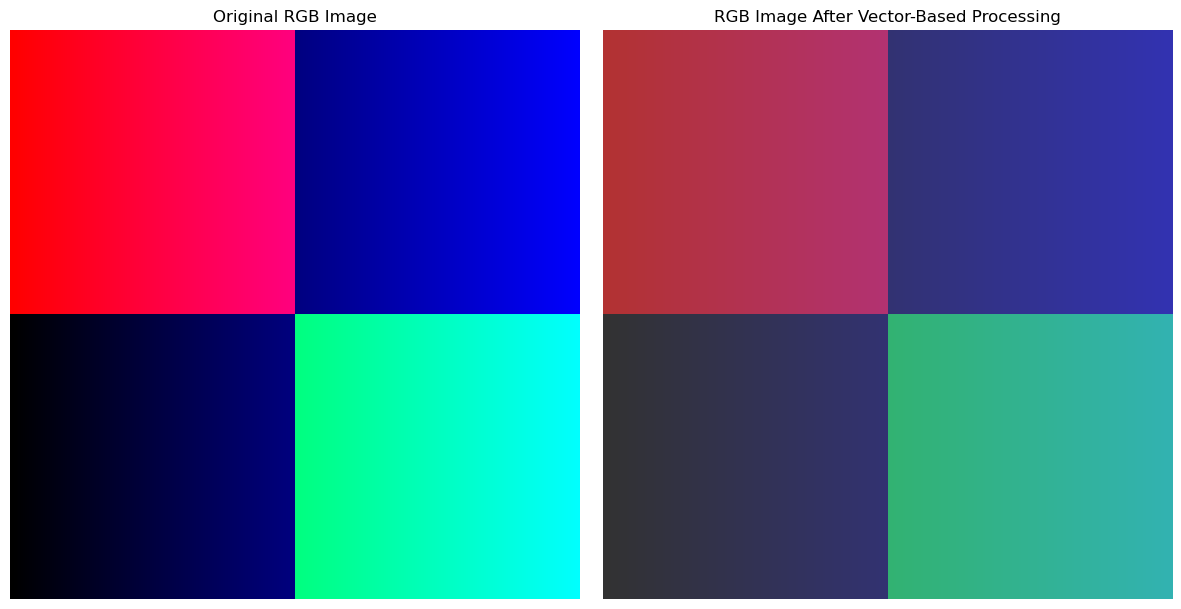

In [4]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# ===========================================================
# Concept of Vector-Based Processing
# ===========================================================
# In this approach, color pixels (Red, Green, and Blue values) are treated as vectors 
# and processed as a whole. Unlike Per-Component Processing, where each channel is handled independently, 
# here we work with the entire RGB vector for each pixel.
#
# Operations are performed directly in the RGB space, allowing for global transformations 
# to be applied to the entire image. This method is ideal for tasks like blending, contrast adjustment, 
# and applying color filters across the entire image at once.
#
# The steps performed in this approach are:
# 1. Load the image and treat the pixels as RGB vectors.
# 2. Apply vector-based processing (color transformation or blending).
# 3. Visualize the original and processed images side by side to see the effect.
#
# Example: In the given program, a weighted transformation is applied to the entire image 
# (all RGB values) simultaneously, blending it with a constant value to demonstrate 
# how the entire RGB vector can be manipulated.
# ===========================================================

# Define the data directory
data_dir = os.path.join(os.getcwd(), 'data', 'images')

# Load grayscale components and combine into an RGB image
R = cv2.imread(os.path.join(data_dir, 'red_band.jpg'), cv2.IMREAD_GRAYSCALE)
G = cv2.imread(os.path.join(data_dir, 'green_band.jpg'), cv2.IMREAD_GRAYSCALE)
B = cv2.imread(os.path.join(data_dir, 'blue_band.jpg'), cv2.IMREAD_GRAYSCALE)

if R is None or G is None or B is None:
    raise FileNotFoundError(f"Ensure all R, G, and B band images are available in {data_dir}.")

# Combine the three components into an RGB image
rgb_image = cv2.merge([B, G, R])

# Apply a color transformation directly on the RGB image (vector-based processing)
# Here, we apply a weighted transformation to blend the image with a constant
# This is done by blending the original image with a zeroed image and adding a scalar offset
rgb_image_processed = cv2.addWeighted(rgb_image, 0.5, np.zeros_like(rgb_image), 0, 50)

# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
plt.title("Original RGB Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rgb_image_processed, cv2.COLOR_BGR2RGB))
plt.title("RGB Image After Vector-Based Processing")
plt.axis('off')

plt.tight_layout()
plt.show()
